# Universal Function Approximation Theorem

https://github.com/mines-opt-ml/decoding-gpt

https://miv.name/decoding-gpt

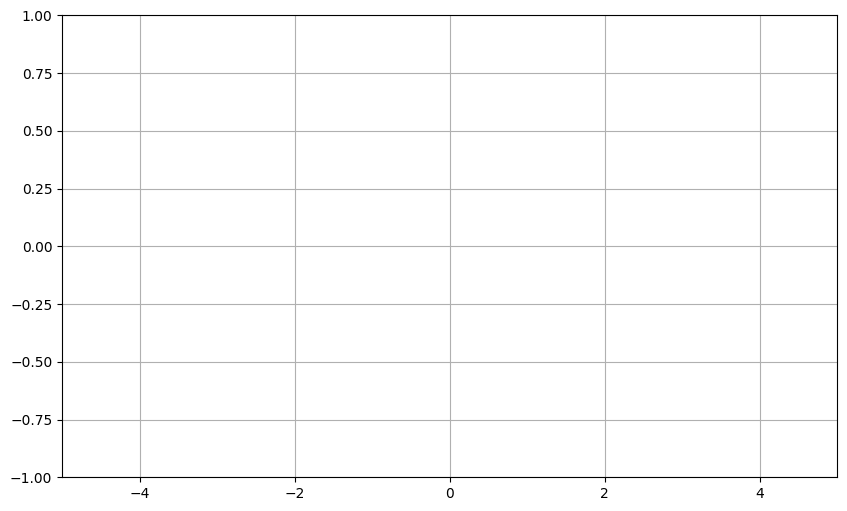

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from jaxtyping import Float
from ipywidgets import interactive, FloatSlider, fixed, Layout, VBox, HBox, interactive_output

def activation_func(x):
    # sigmoid
    # return 1 / (1 + np.exp(-x))
    # relu
    return np.maximum(0, x)
	# heaviside
	# return 1 * (x > 0)

DNNParams = list[tuple[
	Float[np.ndarray, "..."], # weights
	Float[np.ndarray, "..."], # biases
]]

def neural_network(
        input: float, 
        params: DNNParams,
	) -> float:
    
	hidden = input
	for i, (weight, bias) in enumerate(params):
		hidden = activation_func(hidden @ weight + bias)
	return hidden


def plot_network(input_range, **kwargs):
    # Extract hidden_dims from kwargs
    hidden_dims: list[int] = kwargs['hidden_dims']
    del kwargs['hidden_dims']
    dims: list[int] = [1] + hidden_dims + [1]
    num_layers: int = len(dims) - 1

    params: DNNParams = [ # type: ignore
        None
        for _ in range(num_layers)
    ]

    for lyr in range(num_layers):
        params[lyr] = (
            # weights
            np.array([
                [
                    kwargs[f"W{lyr}_[{i},{j}]"] 
                    for j in range(dims[lyr + 1])
                ]
                for i in range(dims[lyr])
            ]),
            # biases
            np.array([
                kwargs[f"B{lyr}_{j}"]
                for j in range(dims[lyr + 1])
            ])
        )

    input = np.linspace(*input_range, 400).reshape(-1, 1)
    output = neural_network(input, params)

    plt.figure(figsize=(10, 6))

    plt.plot(input, output, lw=3, label="Output")
    # intermediate layers
    for lyr in range(num_layers):
        output_intermediate = neural_network(input, params[:lyr+1])
        for k in range(output_intermediate.shape[1]):  
            plt.plot(input, output_intermediate[:, k], lw=1, ls='--', alpha=0.5, label=f"Layer {lyr} Output, dim {k}")
    plt.ylim((-0.25, 1))
    plt.title(f"{num_layers} Layer Neural Network")
    plt.xlabel("Input")
    plt.ylabel("Output")
    plt.grid(True)
    plt.legend(loc='upper left')
    # plt.show()

def make_interactive_plot(hidden_dims: list[int], input_range: tuple[float, float] = (-5, 5)):
    fig, ax = plt.subplots(figsize=(10, 6))
    line, = ax.plot([], [], lw=2)
    ax.set_xlim(*input_range)
    ax.set_ylim(-1, 1)
    ax.grid(True)

    dims = [1] + hidden_dims + [1]
    sliders = {}
    for layer in range(len(dims) - 1):
        for i in range(dims[layer]):
            for j in range(dims[layer+1]):
                sliders[f"W{layer}_[{i},{j}]"] = FloatSlider(
                    value=0.1, min=-2, max=2, step=0.01, 
                    description=f"W{layer}_{i}{j}", 
                    continuous_update=True, 
                    layout=Layout(width='400px'),
                )
        for j in range(dims[layer+1]):
            sliders[f"B{layer}_{j}"] = FloatSlider(
                value=0.0, min=-2, max=2, step=0.01, 
                description=f"B{layer}_{j}", 
                continuous_update=True, 
                layout=Layout(width='400px'),
            )

    # Define the arguments for the plot function
    plot_args = {'input_range': fixed(input_range), **sliders, 'hidden_dims': fixed(hidden_dims)}

    # Create the plot output interactively
    plot_output = interactive_output(plot_network, plot_args)

    # Create a VBox for the sliders
    slider_vbox = VBox([slider for slider in sliders.values() if slider.description.startswith('W') or slider.description.startswith('B')])

    # Display the plot and sliders side by side with sliders on the left
    _ = display(HBox([slider_vbox, plot_output]))

    return plot_output

# Example usage
_ = make_interactive_plot([1])

